In [1]:
# import libraries
import torch
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

In [3]:
import os
os.chdir("..")
from utils.data_utils import ImageDataset

In [91]:
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [133]:
def load_image(image):
    img_array = np.array(Image.open(image))
    img_array = 2*(img_array / 255) - 1
    img_tensor = torch.as_tensor(img_array)
    img_reshaped = img_tensor[None, None, :, :].repeat(1, 3, 1, 1)
    return img_reshaped.type(torch.FloatTensor)

In [134]:
train_dataset_path = "/home/zchayav/projects/syntheye/datasets/eye2gene_new_filepaths/all_baf_valid_50deg_filtered_train_0_edited.csv"
df = pd.read_csv(train_dataset_path)
filepaths = df["file.path"]

In [135]:
img1 = load_image(filepaths[0])
img2 = load_image(filepaths[10])

In [136]:
# import lpips
loss_fn = lpips.LPIPS(net='alex')
d = loss_fn.forward(img1,img2)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/zchayav/anaconda3/envs/syntheye/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth


In [138]:
d.squeeze()

tensor(0.5758, grad_fn=<SqueezeBackward0>)

In [104]:
lpips = LearnedPerceptualImagePatchSimilarity(net_type="vgg", reduction="mean")

In [120]:
for i in range(img1.shape[0]):
    for j in range(img2.shape[0]):
        im1 = img1[i]
        im2 = img2[j]
        score = lpips(im1[None, :, :, :], im2[None, :, :, :])
        print(score)

ValueError: Expected both input arguments to be normalized tensors (all values in range [-1,1]) and to have shape [N, 3, H, W] but `img1` have shape torch.Size([1, 1, 768, 768]) with values in range [tensor(-1.), tensor(0.9686)] and `img2` have shape torch.Size([1, 1, 768, 768]) with value in range [tensor(-1.), tensor(0.9686)]

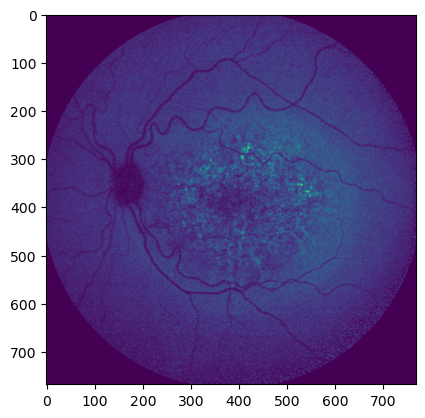

In [94]:
plt.imshow(img2[0, 0, :, :])
plt.show()